In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ensure all necessary libraries are installed (run in your terminal if needed)
# pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
df_test = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\CodSoft_Internship\fraudTest.csv.zip")
df_train = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\CodSoft_Internship\fraudTrain.csv.zip")

In [3]:
len(df_test)

555719

In [4]:
len(df_train)

1296675

In [5]:
df = pd.concat([df_test,df_train])
print(len(df))

1852394


In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [8]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               

In [10]:
df.shape

(1852394, 23)

<Axes: xlabel='is_fraud'>

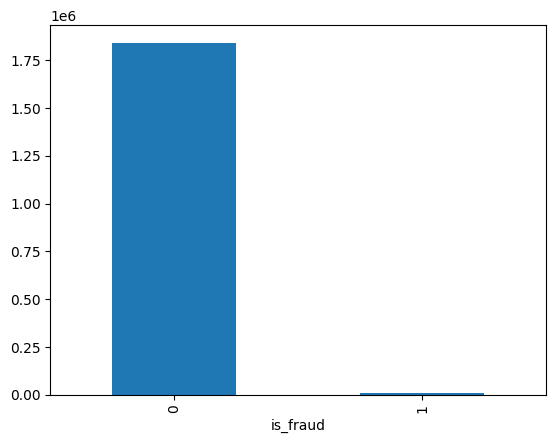

In [11]:
df.groupby('is_fraud').count()['cc_num'].plot.bar()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\DELL\AppData\Local\Temp\ipykernel_8436\1022851957.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_fraud', y='cc_num', data=fraud_counts, palette='viridis')


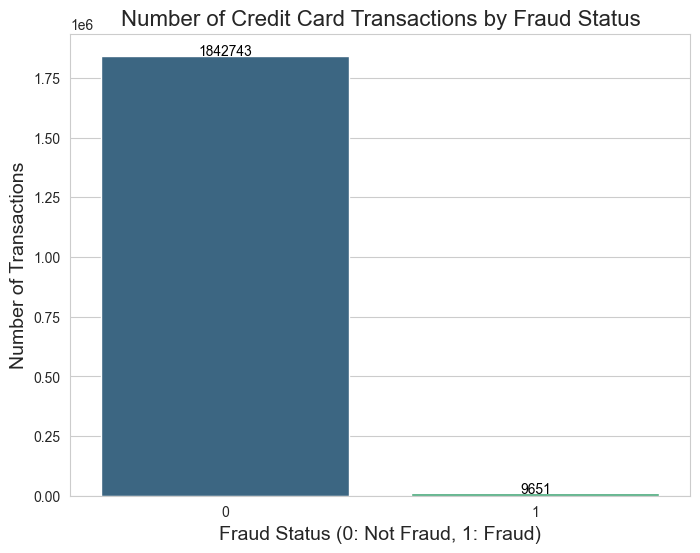

In [13]:
# Group by 'is_fraud' and count the occurrences of 'cc_num'
fraud_counts = df.groupby('is_fraud').count()['cc_num']

# Reset index for easier plotting with seaborn
fraud_counts = fraud_counts.reset_index()

# Set the visual style of the plots
sns.set_style("whitegrid")

# Create a bar plot with enhanced aesthetics
plt.figure(figsize=(8, 6))
sns.barplot(x='is_fraud', y='cc_num', data=fraud_counts, palette='viridis')

# Add titles and labels
plt.title('Number of Credit Card Transactions by Fraud Status', fontsize=16)
plt.xlabel('Fraud Status (0: Not Fraud, 1: Fraud)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

# Annotate the bars with the counts
for index, row in fraud_counts.iterrows():
    plt.text(row.name, row['cc_num'] + 10, round(row['cc_num'], 2), color='black', ha="center")

# Show the plot
plt.show()

In [14]:
fraud = df[df['is_fraud'] == 1]
non_fraud = df[df['is_fraud'] == 0]

print(len(fraud), len(non_fraud))

9651 1842743


In [15]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [16]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [17]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [18]:
df.isna().sum().sum()

0

In [19]:
df.duplicated().sum()

0

<Axes: >

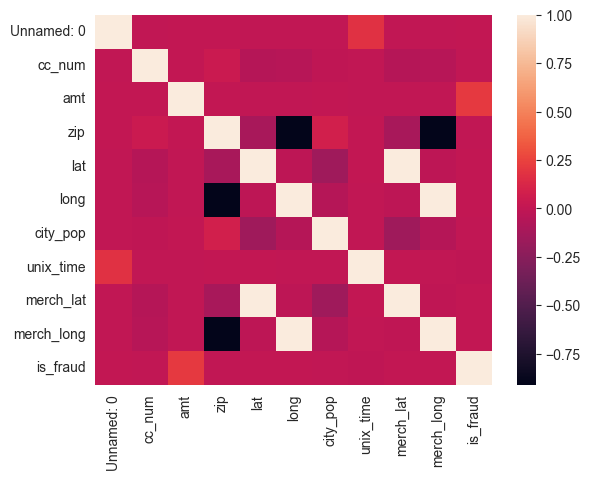

In [20]:
sns.heatmap(df[[i for i in df.columns\
                         if df[i].dtype == 'int64' \
                            or df[i].dtype == 'float64']]\
                            .corr())

In [21]:
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud), random_state= 42)])
df_balanced.shape

(19302, 23)

<Axes: xlabel='is_fraud'>

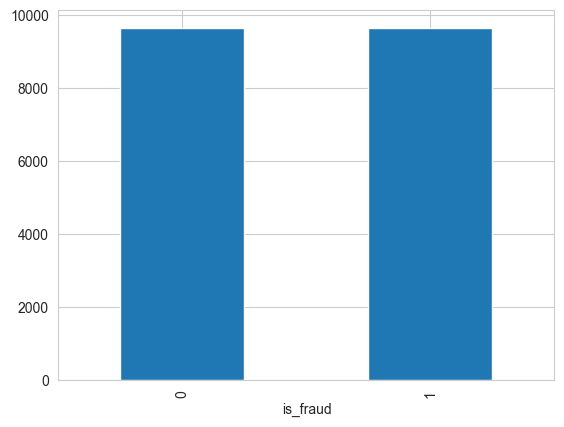

In [22]:
df_balanced.groupby('is_fraud').count()['cc_num'].plot.bar()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8436\898787281.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='is_fraud', y='cc_num', data=fraud_counts, palette='viridis')


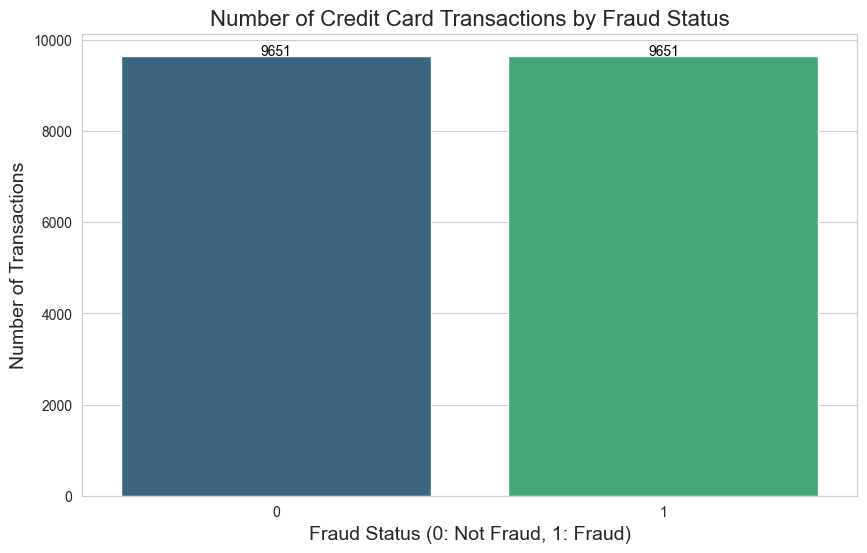

In [23]:
# Group by 'is_fraud' and count the occurrences of 'cc_num'
fraud_counts = df_balanced.groupby('is_fraud').count()['cc_num']

# Reset index for easier plotting with seaborn
fraud_counts = fraud_counts.reset_index()

# Set the visual style of the plots
sns.set_style("whitegrid")

# Create a bar plot with enhanced aesthetics
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='is_fraud', y='cc_num', data=fraud_counts, palette='viridis')

# Add titles and labels
plt.title('Number of Credit Card Transactions by Fraud Status', fontsize=16)
plt.xlabel('Fraud Status (0: Not Fraud, 1: Fraud)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

# Annotate the bars with the counts
for index, row in fraud_counts.iterrows():
    bar_plot.text(row.name, row['cc_num'] + 5, round(row['cc_num'], 2), color='black', ha="center")

# Show the plot
plt.show()

In [24]:
columns_dropped = ['Unnamed: 0',
                   'merchant',
                   'cc_num',
                   'first',
                   'last',
                   'gender',
                   'trans_num',
                   'unix_time',
                   'street',
                   'merch_lat',
                   'merch_long',
                   'job',
                   'zip',
                   ]

df_balanced.drop(columns = columns_dropped, inplace = True)

In [25]:
df_balanced['trans_date_trans_time'] = pd.to_datetime(df_balanced['trans_date_trans_time'])
df_balanced['dob'] = pd.to_datetime(df_balanced['dob'])

In [26]:
df_balanced['trans_date_trans_time'] = df_balanced['trans_date_trans_time'].dt.hour

In [27]:
df_balanced = df_balanced.rename(columns = {'trans_date_trans_time': 'hour_transaction'})

In [28]:
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'morning'
    elif 12 < hour['hour_transaction'] <= 20:
        ans = 'afternoon'
    elif hour['hour_transaction'] <= 4 or hour['hour_transaction'] > 20:
        ans = 'night'
    return ans

In [29]:
df_balanced['hour_transaction'] = df_balanced.apply(get_tod, axis = 1)

In [30]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
1685,night,health_fitness,24.84,Notrees,TX,31.8599,-102.7413,23,1969-09-15,1
1767,night,misc_net,780.52,Benton,WI,42.5545,-90.3508,1306,1958-09-10,1
1781,night,entertainment,620.33,Benton,WI,42.5545,-90.3508,1306,1958-09-10,1
1784,night,shopping_net,1077.69,Denham Springs,LA,30.4590,-90.9027,71335,1994-05-31,1
1857,night,shopping_pos,842.65,Notrees,TX,31.8599,-102.7413,23,1969-09-15,1


In [31]:
df_balanced.tail()

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
99122,morning,grocery_net,35.28,Jones,AL,32.5104,-86.8138,1089,1971-11-02,0
1014904,night,misc_net,11.34,Lake Oswego,OR,45.4093,-122.6847,42817,1982-05-28,0
250736,afternoon,health_fitness,72.70,Ringwood,IL,42.4048,-88.3054,928,1985-05-13,0
304950,night,kids_pets,87.46,Spencer,SD,43.7557,-97.5936,343,1972-03-05,0
134978,afternoon,kids_pets,94.03,Falconer,NY,42.1239,-79.1895,3833,1970-10-09,0


In [32]:
df_balanced['dob']= df_balanced['dob'].dt.year
df_balanced = df_balanced.rename(columns = {'dob': 'age'})

In [33]:
df_balanced['age'] = datetime.now().year - df_balanced['age']

In [34]:
df_balanced[df_balanced['is_fraud'] == 1].groupby('age').count()['is_fraud']

age
19      7
20     32
21     21
22     12
23     58
       ..
96     41
97     54
98     33
99     11
100     7
Name: is_fraud, Length: 82, dtype: int64

In [35]:
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'\
                      or df_balanced[i].dtype =='int32' \
                      or df_balanced[i].dtype =='float64']
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']

In [37]:
NUMERICAL_FEATURES

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']

In [38]:
CATEGORICAL_FEATURES

['hour_transaction', 'category', 'city', 'state']

In [39]:
encoder = OrdinalEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

df_balanced[CATEGORICAL_FEATURES] = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

In [40]:
df_balanced[['is_fraud', 'age']] = df_balanced[['is_fraud', 'age']].astype('float64')

In [41]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balanced)
df_scaled = pd.DataFrame(df_scaled)

In [42]:
last_column = df_scaled.shape[1]-1

In [43]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 9651
Fraud: 9651


In [44]:
df_scaled.rename(columns={last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,1.0,0.384615,0.007776,0.661878,0.86,0.253563,0.643980,0.000000,0.444444,1.0
1,1.0,0.615385,0.254265,0.074033,0.96,0.482735,0.770773,0.000441,0.580247,1.0
2,1.0,0.000000,0.202014,0.074033,0.96,0.482735,0.770773,0.000441,0.580247,1.0
3,1.0,0.846154,0.351196,0.232044,0.36,0.223543,0.765126,0.024534,0.135802,1.0
4,1.0,0.923077,0.274530,0.661878,0.86,0.253563,0.643980,0.000000,0.444444,1.0


In [45]:
X = df_scaled.drop(columns = 'is_fraud')
y = df_scaled['is_fraud']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred_lr = lr.predict(x_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81      1932
         1.0       0.84      0.75      0.79      1929

    accuracy                           0.80      3861
   macro avg       0.81      0.80      0.80      3861
weighted avg       0.81      0.80      0.80      3861



In [48]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = dt.predict(x_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1932
         1.0       0.96      0.96      0.96      1929

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



In [50]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
y_pred_rf = rf.predict(x_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1932
         1.0       0.97      0.97      0.97      1929

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861



In [52]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)
print("Tuned Random Forest:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
118 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

Tuned Random Forest:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1932
         1.0       0.97      0.97      0.97      1929

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861

